In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

# Pre-processing

In [13]:
#read housing.csv file
df = pd.read_csv('/home/roger/housing.csv')

In [14]:
df.dropna()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
7,7049667879,https://auburn.craigslist.org/apa/d/valley-clu...,auburn,https://auburn.craigslist.org,930,apartment,1252,3,2.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00U0U_6VTJdM7e3D...,Details: Beds: 3 Baths: 2 Sqft: 1252 Rent: $93...,32.8113,-85.1749,al
9,7049667852,https://auburn.craigslist.org/apa/d/valley-pri...,auburn,https://auburn.craigslist.org,895,apartment,1118,2,2.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00o0o_hYCEZa5JCv...,Whether you are searching for a home to share ...,32.8113,-85.1749,al
10,7049667981,https://auburn.craigslist.org/apa/d/valley-was...,auburn,https://auburn.craigslist.org,705,apartment,760,1,1.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00P0P_7jWrJLpPFH...,Details: Beds: 1 Baths: 1 Sqft: 760 Rent: $705...,32.8113,-85.1749,al
11,7037871624,https://auburn.craigslist.org/apa/d/auburn-spa...,auburn,https://auburn.craigslist.org,1000,apartment,2097,3,2.0,1,...,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00808_8HcLImoydi...,Country living close to town. On just around 3...,38.9829,-121.0940,al
17,7049885081,https://bham.craigslist.org/apa/d/birmingham-s...,birmingham,https://bham.craigslist.org,850,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00x0x_aHOsnIW1PQ...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384968,7028099401,https://wyoming.craigslist.org/apa/d/sheridan-...,wyoming,https://wyoming.craigslist.org,824,apartment,1174,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01414_gHw1fJj4iP...,Peak Apartments - a âGreenâ community - is...,44.8064,-106.9900,wy
384969,7027870647,https://wyoming.craigslist.org/apa/d/laramie-f...,wyoming,https://wyoming.craigslist.org,1120,apartment,850,2,2.0,1,...,1,0,1,w/d in unit,off-street parking,https://images.craigslist.org/00J0J_1lOadXi8wy...,A Full-unit of a 2 Bedroom in the Verge Apartm...,41.3136,-105.5550,wy
384974,7026010527,https://wyoming.craigslist.org/apa/d/rock-spri...,wyoming,https://wyoming.craigslist.org,899,apartment,950,2,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00101_8WijiIwWq6...,The Preserve at Rock Springs offers 9 differen...,41.5961,-109.2540,wy
384975,7026008298,https://wyoming.craigslist.org/apa/d/rock-spri...,wyoming,https://wyoming.craigslist.org,699,apartment,650,1,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00101_8WijiIwWq6...,Don't miss your chance living in the best apar...,41.5961,-109.2540,wy


In [16]:
df1 = df[np.logical_and(df.price >= 100, df.price <= 10000)]
df1 = df1[np.logical_and(df1.sqfeet >= 300, df1.sqfeet <= 99999)]
df1 = df1[np.logical_and(df1.beds >= 1, df1.beds <= 999)]
df1 = df1[np.logical_and(df1.baths >= 1, df1.baths <= 999)]

#df1 = df1[df1.type == 'house']
print(df1.shape)
df1.describe()

(367081, 22)


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.670810e+05,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,367081.000000,365250.000000,365250.000000
mean,7.040950e+09,1193.907034,1017.352037,1.950717,1.506343,0.727425,0.709149,0.734691,0.079767,0.012687,0.043996,37.219171,-92.544547
std,8.809169e+06,592.988601,639.375624,0.826026,0.576883,0.445284,0.454156,0.441498,0.270933,0.111918,0.205086,5.545326,16.470696
min,7.003808e+09,100.000000,300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035959e+09,820.000000,768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.423700,-98.640125
50%,7.043171e+09,1050.000000,950.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.622300,-87.624100
75%,7.048408e+09,1400.000000,1154.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.137900,-81.159500
max,7.051292e+09,10000.000000,99204.000000,8.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [17]:
# remove duplicate rows
df1.drop_duplicates(inplace = True)
df1.shape

(367081, 22)

In [11]:
# check for dupliate rows
df1.duplicated().sum()

0

In [18]:
df1['type'].value_counts()

apartment          302020
house               32526
townhouse           15663
condo                6007
duplex               4924
manufactured         4065
cottage/cabin         625
loft                  616
flat                  499
in-law                130
land                    4
assisted living         2
Name: type, dtype: int64

In [19]:
df1 = df1[df1.type.isin(['house', 'townhouse', 'condo', 'duplex'])]

In [20]:
# get the count of each type of house
df1['beds'].value_counts().sort_index()

1     3521
2    20330
3    26072
4     7016
5     1923
6      205
7       33
8       20
Name: beds, dtype: int64

In [21]:
# get the count of each type of house
df1['baths'].value_counts().sort_index()

1.0    15536
1.5    10234
2.0    20245
2.5     8670
3.0     3030
3.5      812
4.0      396
4.5      103
5.0       51
5.5       18
6.0       17
6.5        3
7.0        4
7.5        1
Name: baths, dtype: int64

In [22]:
df1['state'].value_counts()

fl    5262
ca    5139
oh    3051
tx    2916
mi    2717
il    2234
va    2190
pa    2168
ny    2024
nc    2002
or    1620
co    1535
sc    1525
tn    1415
ia    1264
mn    1218
ks    1206
in    1136
wi    1107
wa    1071
ga    1003
la     969
id     968
hi     889
al     874
nj     868
az     811
md     792
ar     750
ma     741
ct     721
ok     688
ky     687
mo     648
ak     638
ms     547
ut     536
nm     430
mt     415
ne     281
nv     274
sd     246
wv     238
nh     234
dc     203
ri     189
de     182
nd     168
me     143
vt     132
wy      55
Name: state, dtype: int64

In [23]:
header = ['state', 'region', 'type', 'price', 'sqfeet', 'beds','baths']
df1['region'] = df1['region'].replace(",", " ", regex=True)
df1.to_csv('/home/roger/housing2.csv', columns=header, index=False)

In [6]:
df2 = df[np.logical_and(df.state=='wi', df.type =='house')]
df2.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,493.000000,493.000000
mean,7.040600e+09,1373.945892,1634.038076,3.206413,1.785571,0.490982,0.537074,0.591182,0.074148,0.012024,0.082164,43.626171,-89.050456
std,9.126016e+06,1063.246377,822.214377,1.115552,0.742508,0.500420,0.499124,0.492109,0.262275,0.109102,0.274890,0.815961,1.163408
min,7.005972e+09,0.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.342100,-92.549300
25%,7.034043e+09,850.000000,1100.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.047900,-89.515100
50%,7.042762e+09,1100.000000,1500.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,43.184600,-89.002500
75%,7.048134e+09,1613.500000,1981.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,44.242500,-88.010200
max,7.051238e+09,16000.000000,7292.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.756800,-87.373700


# Visualization

In [11]:
# datatypes of each variable of dataframe
df1.dtypes


id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

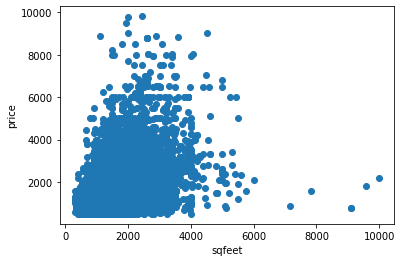

In [12]:
# plot a graph for price vs sqfeet
plt.scatter(df1['sqfeet'], df1['price'])
plt.xlabel('sqfeet')
plt.ylabel('price')
plt.show()

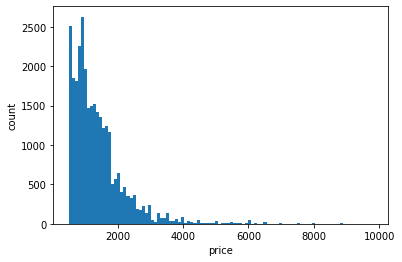

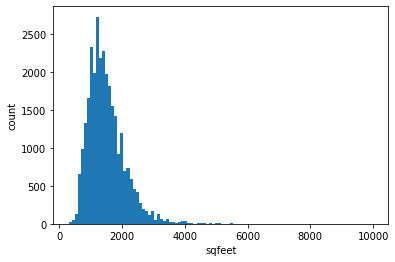

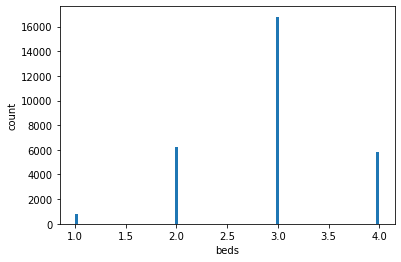

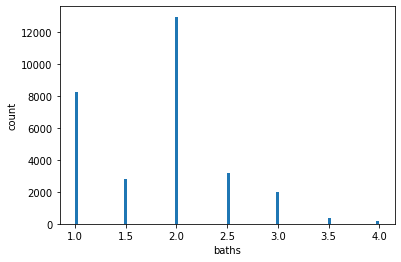

In [13]:
# histogram of price between 500 and 3000
plt.hist(df1['price'], bins = 100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

# histogram of sqfeet
plt.hist(df1['sqfeet'], bins = 100)
plt.xlabel('sqfeet')
plt.ylabel('count')
plt.show()

# histogram of beds
plt.hist(df1['beds'], bins = 100)
plt.xlabel('beds')
plt.ylabel('count')
plt.show()

# distribution of baths
plt.hist(df1['baths'], bins = 100)
plt.xlabel('baths')
plt.ylabel('count')
plt.show()



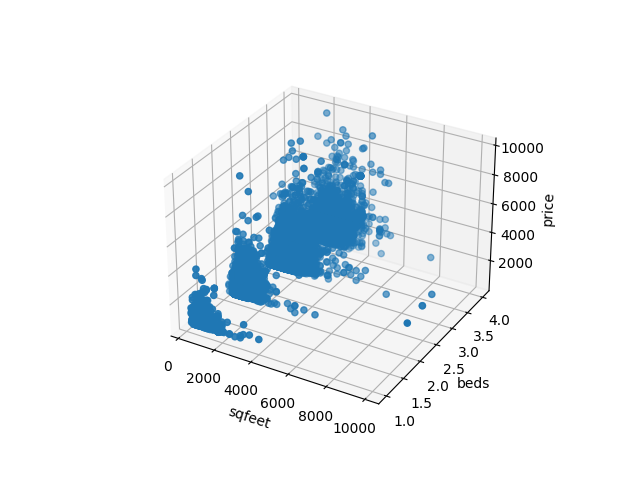

In [14]:
# 3 a 3d plot of price vs sqfeet vs beds
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['sqfeet'], df1['beds'], df1['price'])
ax.set_xlabel('sqfeet')
ax.set_zlabel('price')
ax.set_ylabel('beds')
plt.show()


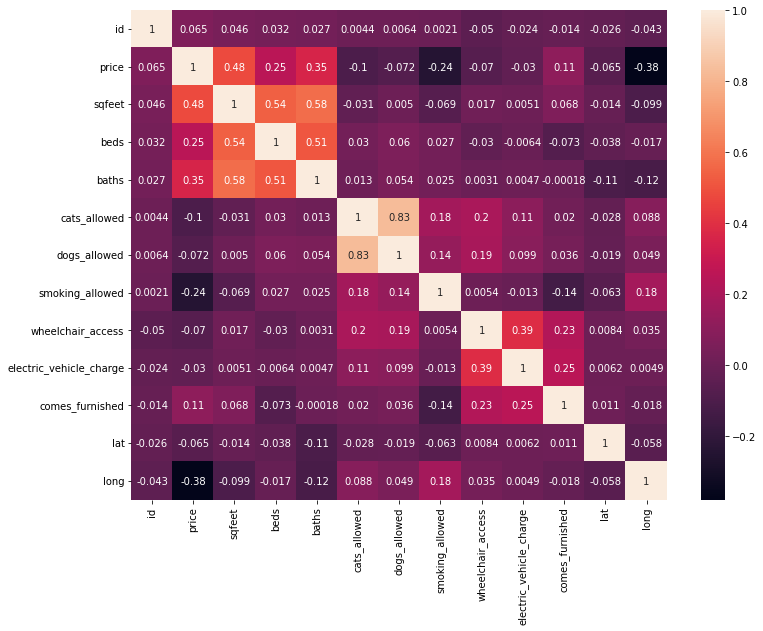

In [19]:
#draw a heatmap of correlation between variables
%matplotlib inline
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)
plt.show()